In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and shuffle the dataset manually
df = pd.read_csv("/Users/jaeeponde/IML_A1/IML_A1/trail_training_data.csv")
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Extract features and target
X = df_shuffled.drop(columns='FUEL CONSUMPTION').values
y = df_shuffled['FUEL CONSUMPTION'].values

# Manual train-test split (80% train, 20% cross-validation)
split_index = int(0.8 * len(X))  # 80% split
X_train = X[:split_index]
y_train = y[:split_index]
X_cv = X[split_index:]
y_cv = y[split_index:]


# Step 1: Add Bias Termx
def add_bias_term(X):
    return np.column_stack([np.ones(X.shape[0]), X])

# Step 2: Polynomial Feature Transformation
def polynomial_features(X, degree):
    poly_X = X.copy()
    for deg in range(2, degree + 1):
        poly_X = np.column_stack([poly_X, X ** deg])
    return poly_X

# Step 3: Initialize Weights
def initialize_weights(n_features):
    return np.full(n_features, 1)

# Step 4: Hypothesis Function (for predictions)
def hypothesis(X, weights):
    return np.dot(X, weights)

# Step 5: Mean Squared Error (MSE) with Regularization (L2)
def mse_loss(y_true, y_pred, weights, lambda_):
    regularization_term = lambda_ * np.sum(weights[1:] ** 2)  # Regularize all weights except the bias term
    return np.mean((y_true - y_pred) ** 2) + regularization_term

# Step 6: Root Mean Squared Error (RMSE)
def rmse_loss(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Step 7: R-squared (R²)
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Step 8: Gradient Descent with Regularization and Automatic Convergence
def gradient_descent(X, y, weights, learning_rate, lambda_, tolerance=1e-6):
    m = X.shape[0]
    prev_loss = float('inf')
    epoch = 0
    while True:
        y_pred = hypothesis(X, weights)
        gradients = (1/m) * np.dot(X.T, (y_pred - y)) + lambda_ * np.r_[0, weights[1:]]  # Apply L2 regularization (skip bias term)
        weights = weights - learning_rate * gradients

        # Compute the current loss with regularization
        loss = mse_loss(y, y_pred, weights, lambda_)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {loss:.4f}")
        
        # Check for convergence
        if abs(prev_loss - loss) < tolerance:
            print(f"Converged after {epoch} epochs with a tolerance of {tolerance}")
            break
        
        prev_loss = loss
        epoch += 1

    return weights, epoch

# Step 9: Train the Model
degree = 3 # Degree of the polynomial
X_train_poly = polynomial_features(X_train, degree)
X_train_bias = add_bias_term(X_train_poly)

X_cv_poly = polynomial_features(X_cv, degree)
X_cv_bias = add_bias_term(X_cv_poly)

n_features = X_train_bias.shape[1]
weights = initialize_weights(n_features)

learning_rate = 0.3
lambda_ = 0  # Regularization strength
tolerance = 1e-6  # Convergence threshold

# Train the model using gradient descent with regularization and convergence check
trained_weights, n_epochs = gradient_descent(X_train_bias, y_train, weights, learning_rate, lambda_, tolerance)

# Step 10: Predictions on Training and Cross-Validation Data
y_train_pred = hypothesis(X_train_bias, trained_weights)
y_cv_pred = hypothesis(X_cv_bias, trained_weights)

# Step 11: Calculate Metrics for Training Data
train_mse = mse_loss(y_train, y_train_pred, trained_weights, lambda_)
train_rmse = rmse_loss(y_train, y_train_pred)
train_r2 = r_squared(y_train, y_train_pred)

# Step 12: Calculate Metrics for Cross-Validation Data
cv_mse = mse_loss(y_cv, y_cv_pred, trained_weights, lambda_)
cv_rmse = rmse_loss(y_cv, y_cv_pred)
cv_r2 = r_squared(y_cv, y_cv_pred)




Epoch 0: MSE = 26.0405
Epoch 100: MSE = 1.2167
Epoch 200: MSE = 0.8993
Epoch 300: MSE = 0.7184
Epoch 400: MSE = 0.6034
Epoch 500: MSE = 0.5284
Epoch 600: MSE = 0.4783
Epoch 700: MSE = 0.4441
Epoch 800: MSE = 0.4200
Epoch 900: MSE = 0.4024
Epoch 1000: MSE = 0.3891
Epoch 1100: MSE = 0.3788
Epoch 1200: MSE = 0.3704
Epoch 1300: MSE = 0.3635
Epoch 1400: MSE = 0.3576
Epoch 1500: MSE = 0.3525
Epoch 1600: MSE = 0.3479
Epoch 1700: MSE = 0.3438
Epoch 1800: MSE = 0.3402
Epoch 1900: MSE = 0.3368
Epoch 2000: MSE = 0.3337
Epoch 2100: MSE = 0.3308
Epoch 2200: MSE = 0.3282
Epoch 2300: MSE = 0.3257
Epoch 2400: MSE = 0.3234
Epoch 2500: MSE = 0.3212
Epoch 2600: MSE = 0.3192
Epoch 2700: MSE = 0.3172
Epoch 2800: MSE = 0.3154
Epoch 2900: MSE = 0.3137
Epoch 3000: MSE = 0.3120
Epoch 3100: MSE = 0.3105
Epoch 3200: MSE = 0.3090
Epoch 3300: MSE = 0.3076
Epoch 3400: MSE = 0.3062
Epoch 3500: MSE = 0.3049
Epoch 3600: MSE = 0.3037
Epoch 3700: MSE = 0.3025
Epoch 3800: MSE = 0.3014
Epoch 3900: MSE = 0.3003
Epoch 4000:

Training MSE: 0.2637
Training RMSE: 0.5135
Training R²: 0.9726
CV MSE: 0.3380
CV RMSE: 0.5814
CV R²: 0.9693


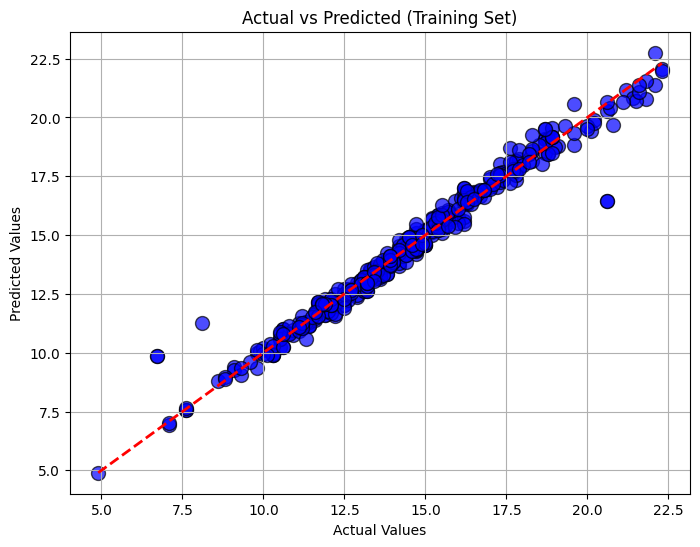

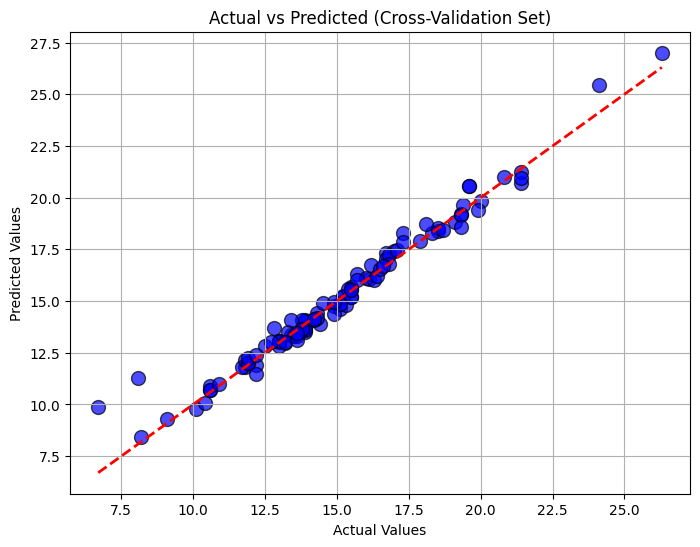

In [115]:
# Output training and cross-validation metrics
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")

print(f"CV MSE: {cv_mse:.4f}")
print(f"CV RMSE: {cv_rmse:.4f}")
print(f"CV R²: {cv_r2:.4f}")

# Step 13: Plot Actual vs Predicted for Training and CV sets
def plot_actual_vs_predicted(y_true, y_pred, dataset_type):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', edgecolors='k', alpha=0.7, s=100)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', linewidth=2)
    plt.title(f'Actual vs Predicted ({dataset_type})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Plot for training data
plot_actual_vs_predicted(y_train, y_train_pred, 'Training Set')

# Plot for cross-validation data
plot_actual_vs_predicted(y_cv, y_cv_pred, 'Cross-Validation Set')